<hr style="height:4px;border-width:0;color:black;background-color:green">

## Inference of Covid-19 Vaccines Effectiveness and Uncertainty Using Bayesian Methods
<hr style="height:4px;border-width:0;color:black;background-color:green">

####  Mojtaba Roshana
#### Mariam Hergnyan



<hr style=\"border-top-width:4px; border-top-color: #00df;\">

### Introduction:
Several Covid-19 Vaccines have been authorized by the European Medicines Agency (EMA):

• Nuvaxovid (Novavax CZ)

• Vaxzevria (AstraZeneca AB)

• Spikevax (Moderna Biotech)

• Comirnaty (BioNTech/Pfizer)

• Jcovden (Janssen-Cilag)
<hr style=\"border-top-width:4px; border-top-color: #00df;\">

### Goals:

1. collect official data available on the clinical trial performed for each vaccine and compute with JAGS the efficacy of each Vaccine and the the 95% credibility interval.



2. perform a bayesian analysis of the data as afunction of the age of the patients.

 ### Colecting data
 At first we will do all steps for one of the vaccines and then we will do same computatuion for all vaccine which mentioned.
 
Data for Nuvaxovid (Novavax CZ) :

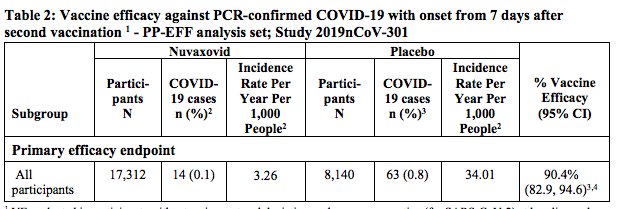

In clinical trails wthere are two Subgroup:
* Participants who got the vaccine
* Participants who got placebo

* Placebo: 

A placebo is an inactive substance that looks like the drug or treatment being tested. Comparing results from the two groups suggests whether changes in the test group result from the treatment or occur by chance.

In [11]:
# DATA
nuvaxovid <- list(nV.I=14,nP.I=63,nV=17312,nP=8140)

* nP.I: &emsp; number of people in placebo gp who got Infected


* nV.I: &emsp; number of people in vaccine gp who got Infected


* nV:  &emsp;  number people in vaccine gp


* nP:  &emsp;   number people in placebo gp


* pA:  &emsp;  probability to get infected


* prob:&emsp; probability to get infected while you are vaccinated


* epsilon:&emsp;efficacy of vaccine = 1 - prob

In [5]:
library(rjags)

Loading required package: coda

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs



In [13]:
# DEFINE the MODEL 
model_vaccine <- "model{
nP.I ~ dbin(pA, nP)         
nV.A ~ dbin(pA, nV) 
nV.I ~ dbin(prob, nV.A)     # prob = 1 - epsilon

# Priors of nodes with no parents 
pA ~ dbeta(1,1) 
prob ~ dbeta(1,1) 

epsilon <- 1 - prob         # epsilon is efficiency
}"

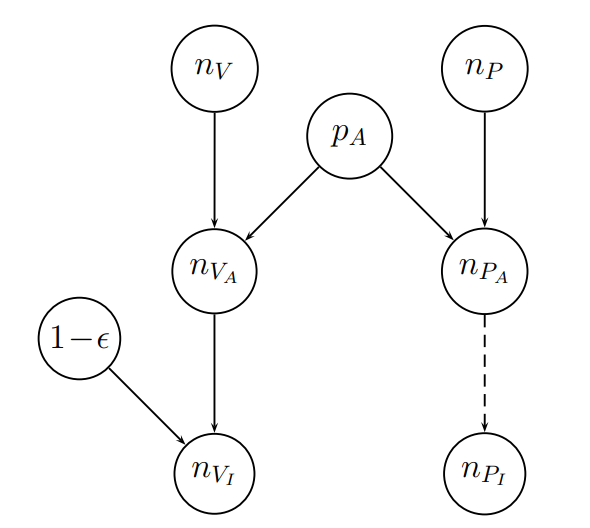

#### Efficiency is the $\epsilon$ here

In [16]:
model_jags_nuvaxovid <- jags.model(textConnection(model_vaccine),data=nuvaxovid,inits = list(.RNG.name= "base::Wichmann-Hill", .RNG.seed=14))
update(model_jags_nuvaxovid, 1000) 

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 3
   Total graph size: 9

Initializing model




model : our model which we defined

variable.names : values to trace in the chain

n.iter : number of iteration to run the chain

In [22]:
post_sim <- coda.samples(model=model_jags_nuvaxovid,variable.names = c("epsilon","nV.A"),n.iter=100000)
posterior_nuvaxovid<- post_sim
Summary_nuvaxovid <- summary(posterior_nuvaxovid)
Summary_nuvaxovid$statistics

,Mean,SD,Naive SE,Time-series SE
epsilon,0.8861709,0.03292594,0.0001041209,0.0001885189
nV.A,132.8106400,20.27992938,0.0641307676,0.1702775225


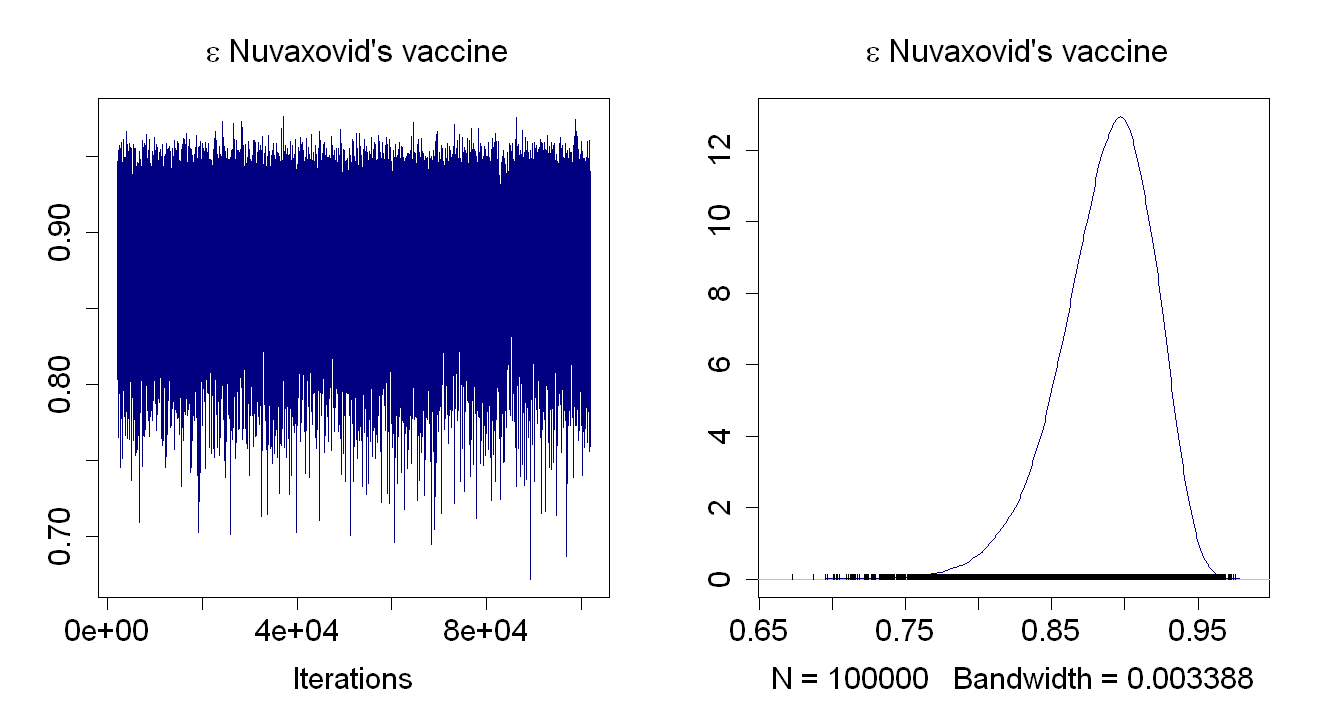

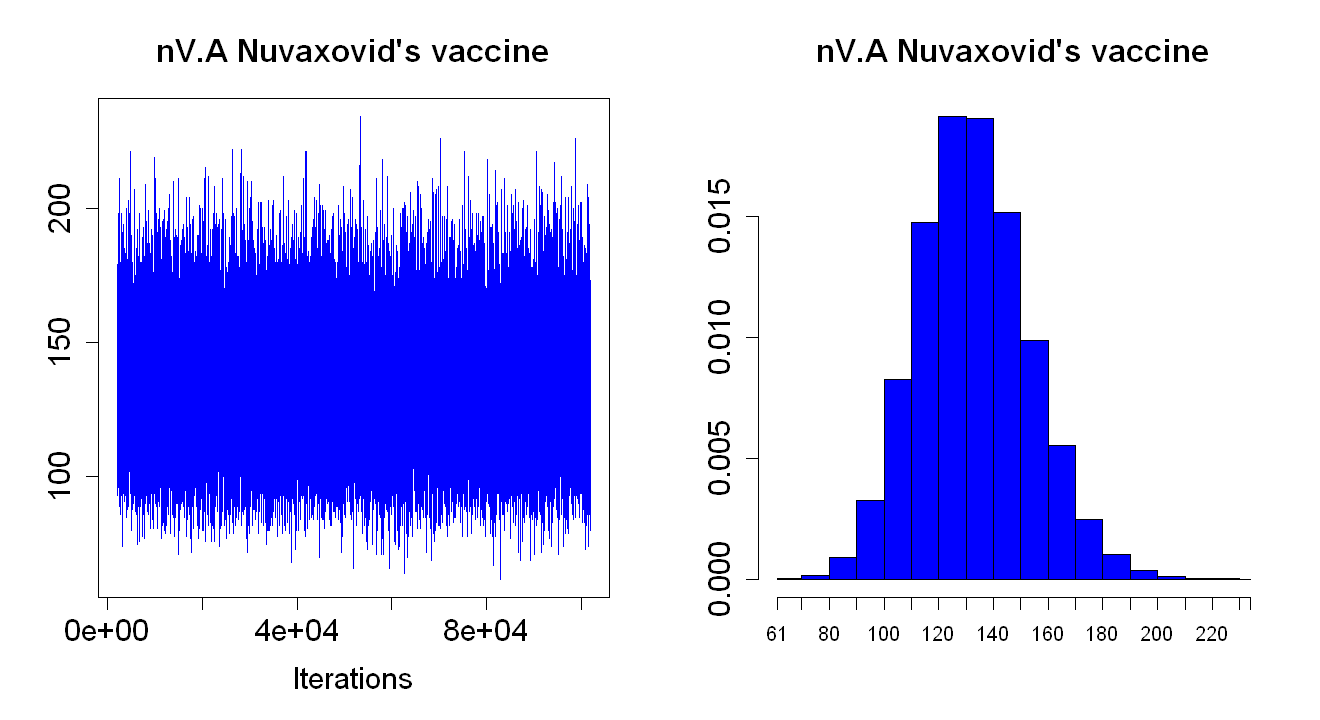

In [18]:
epsilon_nuvaxovid_mean <- Summary_nuvaxovid$statistics[1,1]
epsilon_nuvaxovid_std <- Summary_nuvaxovid$statistics[1,2]
mean.nV.A_nuvaxovid <- Summary_nuvaxovid$statistics[2,1]
std.nV.A_nuvaxovid <- Summary_nuvaxovid$statistics[2,2]
options(repr.plot.width=11, repr.plot.height =6)
plot(posterior_nuvaxovid[,1],trace=TRUE,col="navy",main =  ~ epsilon ~ "Nuvaxovid's vaccine",cex.lab=1.5, cex.axis=1.5, cex.main=1.6 )
plot(posterior_nuvaxovid[,2],trace=TRUE,col="blue",main =  "nV.A Nuvaxovid's vaccine",cex.lab=1.5, cex.axis=1.5, cex.main=1.6 )


In [23]:
samples_matrixE <- as.matrix(posterior_nuvaxovid) 
head(samples_matrixE,5)
density_E <- density(samples_matrixE[,1])
index_maxE <- which.max(density_E$y)

epsilon,nV.A
0.9077591,116
0.8564824,129
0.8825127,122
0.8946528,134
0.8796444,134


In [26]:
modeE <- density_E$x[index_maxE]


lower=Summary_nuvaxovid$quantiles[1,1]*100
upper=Summary_nuvaxovid$quantiles[1,5]*100
cat(paste('The 95% credible interval for Nuvaxovid vaccine efficacy is[',round(lower,1),'%,',round(upper,1),'%]',"\n"))
cat(paste("The Mode of Nuvaxovid's vaccine efficacy is", modeE ,"\n"))
cat(paste("The Mean of Nuvaxovid's vaccine efficacy is", epsilon_nuvaxovid_mean ,"\n"))
Summary_nuvaxovid$quantiles

The 95% credible interval for Nuvaxovid vaccine efficacy is[ 81.2 %, 94 %] 
The Mode of Nuvaxovid's vaccine efficacy is 0.893424907522284 
The Mean of Nuvaxovid's vaccine efficacy is 0.886701732779579 


,2.5%,25%,50%,75%,97.5%
epsilon,0.811839,0.8666463,0.8898539,0.9096547,0.9398543
nV.A,96.000000,119.0000000,132.0000000,146.0000000,175.0000000


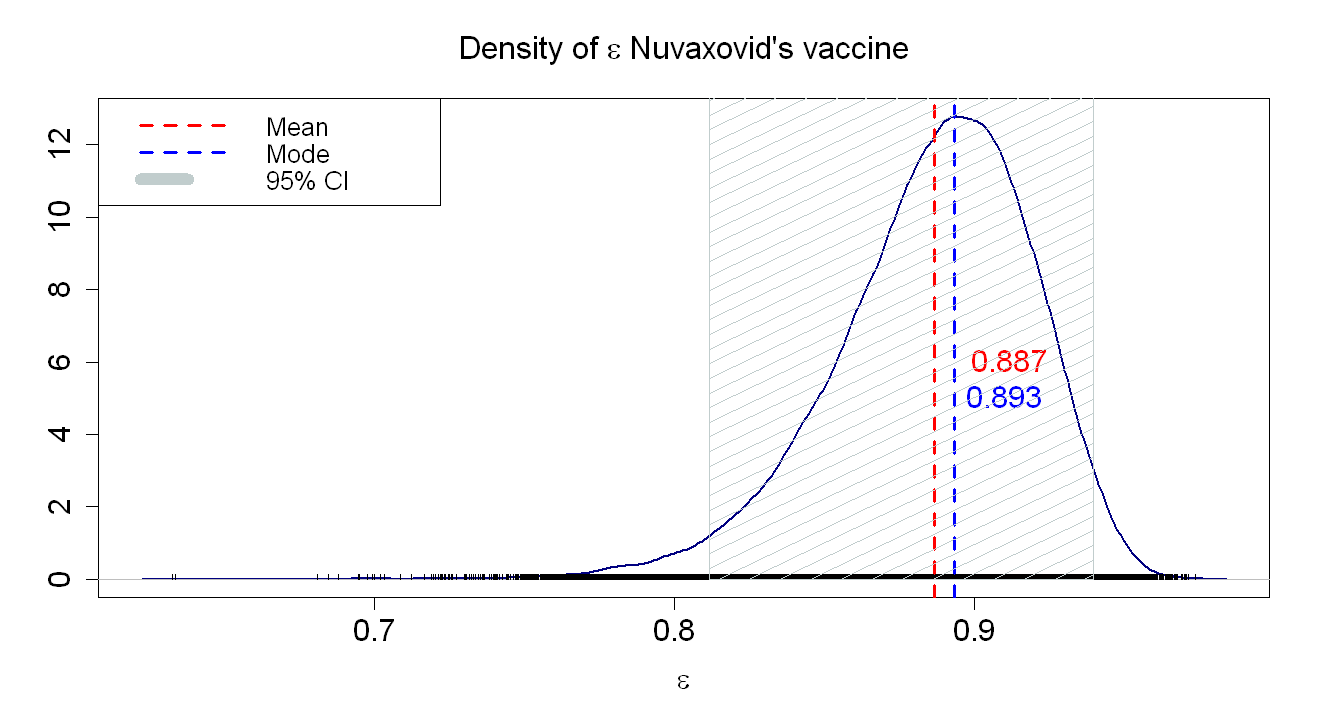

In [110]:
plot(posterior_nuvaxovid[,1],trace=FALSE,col="navy",xlab=expression(epsilon),main="Density of" ~ epsilon ~ "Nuvaxovid's vaccine",lwd=2,cex.lab=1.5, cex.axis=1.5, cex.main=1.6)
abline(v = epsilon_nuvaxovid_mean, col="red", lwd=3, lty=2)
abline(v = density_E$x[index_maxE], col="blue", lwd=3, lty=2)
text(density_E$x[index_maxE],         
     5,                                               
     round(density_E$x[index_maxE],digits = 3),         
     pos = 4,col = "blue",cex=1.5) 
text(0.895,                                    
     6,                                             
     round(epsilon_nuvaxovid_mean,3),         
     pos = 4,col = "red",cex=1.5) 
rect(lower*0.01, 0, upper*0.01, 16, density = 10, border = "azure3", col = "azure3")

legend("topleft", legend=c("Mean", "Mode","95% CI"),
       col=c("red", "blue","azure3"), lty=c(2,2,2),lwd=c(3,3,10), cex=1.3) 



* Define a function to do same computation for all vaccines and plot important information about efficiency:

In [111]:
#take data and name of vaccine as input and gives all important features for the vaccine and plot them

plot_95CI<- function(data,name) {
    model_jags <- model_load(data)
    update(model_jags, 1000) 
    post_sim <- coda.samples(model=model_jags,variable.names = c("epsilon","nV.A"),n.iter=100000)
    posterior<- post_sim
    Summary <- summary(posterior)
    epsilon_mean <- Summary$statistics[1,1]
    epsilon_std <- Summary$statistics[1,2]
    mean.nV.A <- Summary$statistics[2,1]
    std.nV.A<- Summary$statistics[2,2]
    samples_matrixE <- as.matrix(posterior) 
    head(samples_matrixE,5)
    density_E <- density(samples_matrixE[,1])
    index_maxE <- which.max(density_E$y)
    modeE <- density_E$x[index_maxE]

    lower=Summary$quantiles[1,1]*100
    upper=Summary$quantiles[1,5]*100
    plot(posterior[,1],trace=FALSE,col="navy",xlab=expression(epsilon),main=paste("Density of epsilon",name,"'s vaccine\n","95%CI=[",round(lower,1),'%,',round(upper,1),"%]"),lwd=2,cex.lab=1.5, cex.axis=1.5, cex.main=1.6)
    abline(v = epsilon_mean, col="red", lwd=3, lty=2)
    abline(v = density_E$x[index_maxE], col="navy", lwd=3, lty=2)
    text(density_E$x[index_maxE],         
         5,                                               
         round(density_E$x[index_maxE],digits = 3),         
         pos = 4,col = "navy",cex=1.5) 
    text(density_E$x[index_maxE],                                   
         6,                                             
         round(epsilon_mean,3),         
         pos = 4,col = "red",cex=1.5) 
    rect(lower*0.01, 0, upper*0.01, 35, density = 10, border = "azure3", col = "azure3")
    
    legend("topleft", legend=c("Mean", "Mode","95% CI"),
           col=c("red", "navy","azure3"), lty=c(2,2,2),lwd=c(3,3,10), cex=1.3) 
    return(c(name,round(epsilon_mean,3),round(epsilon_std,3),round(modeE,3),round(Summary$quantiles[1,1]*100,3),round(Summary$quantiles[1,5]*100,3),data$nV.I,data$nV,data$nP.I,data$nP))

}

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 3
   Total graph size: 9

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 3
   Total graph size: 9

Initializing model



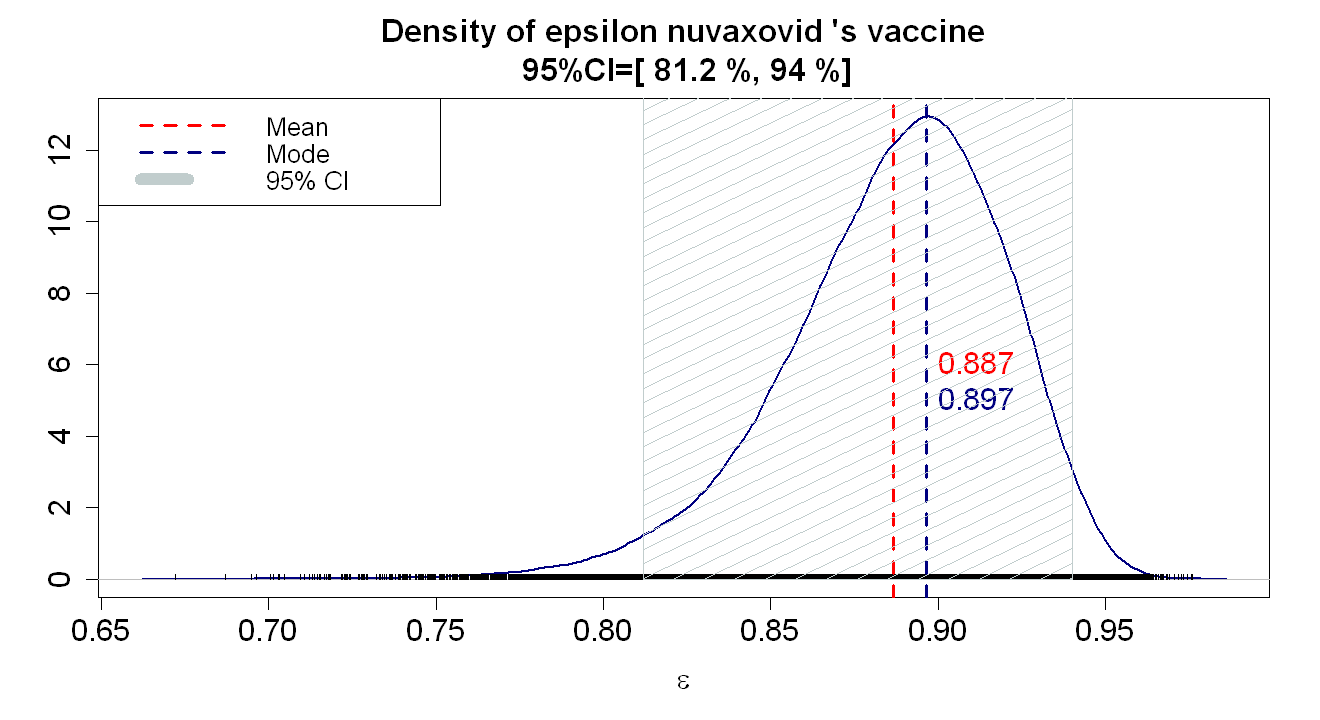

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 3
   Total graph size: 9

Initializing model



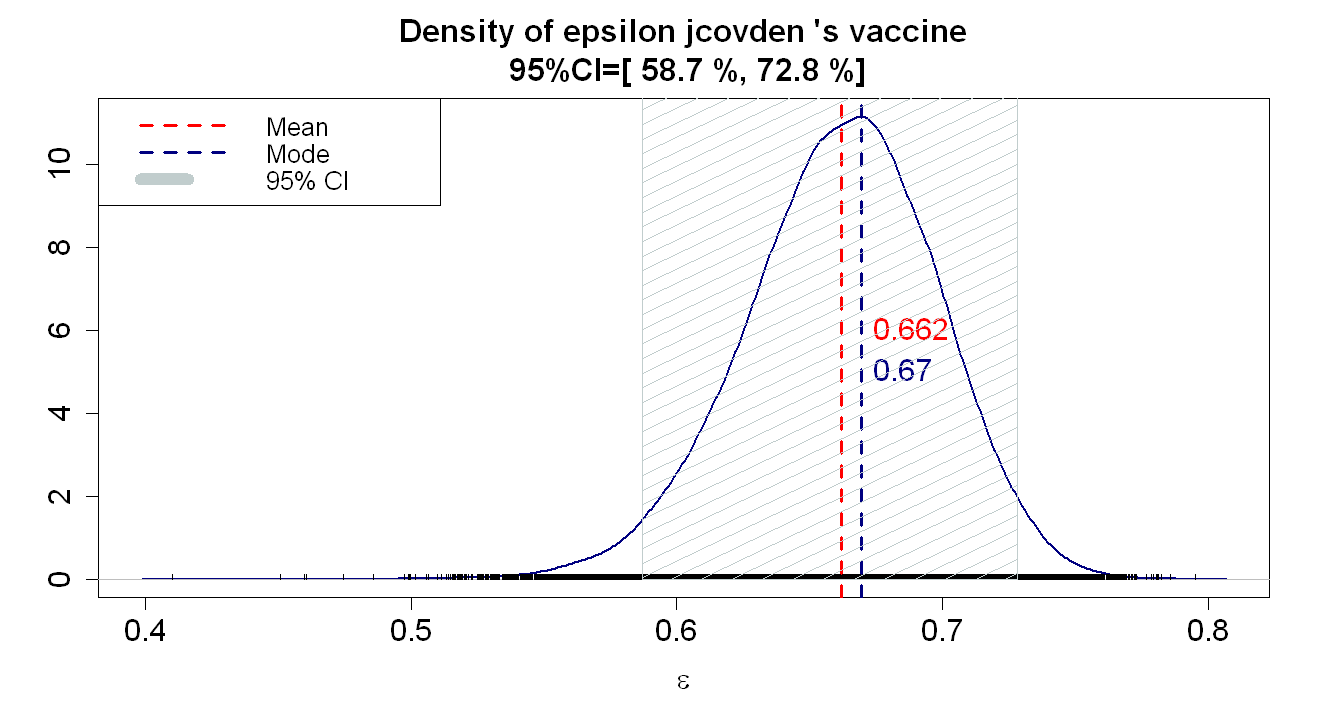

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 3
   Total graph size: 9

Initializing model



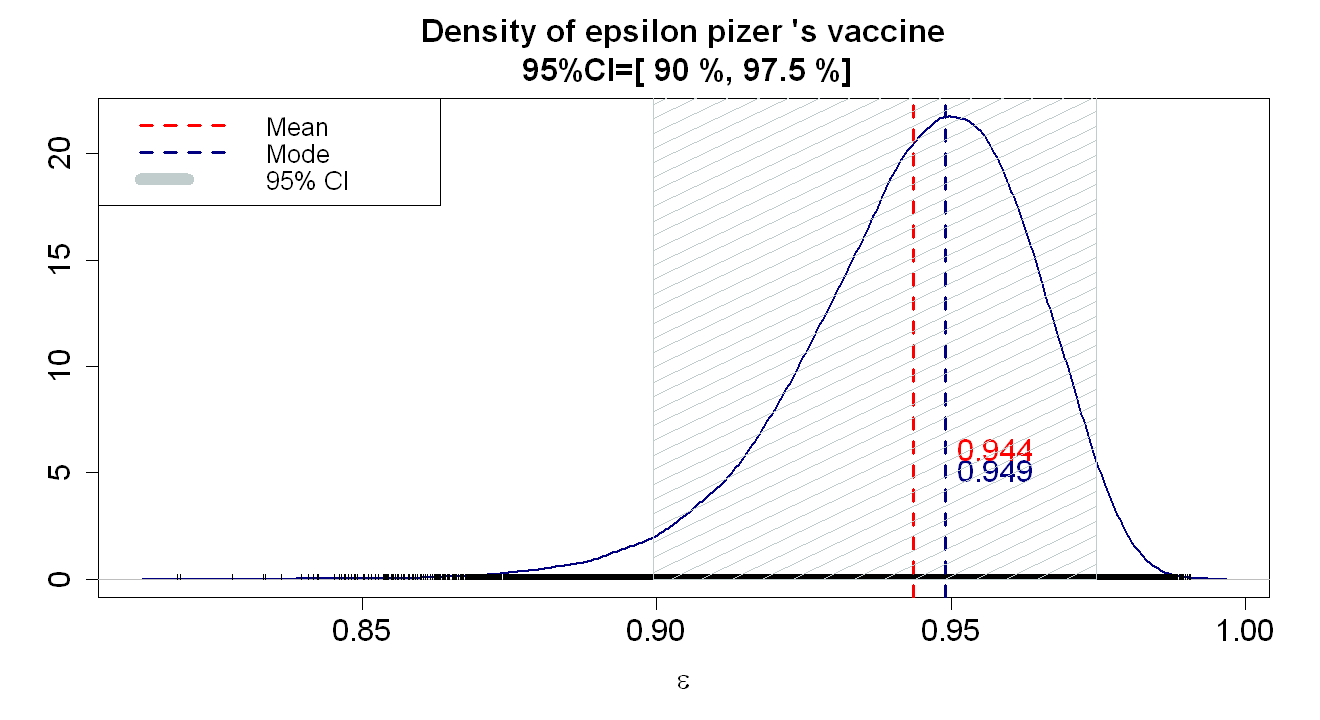

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 3
   Total graph size: 9

Initializing model



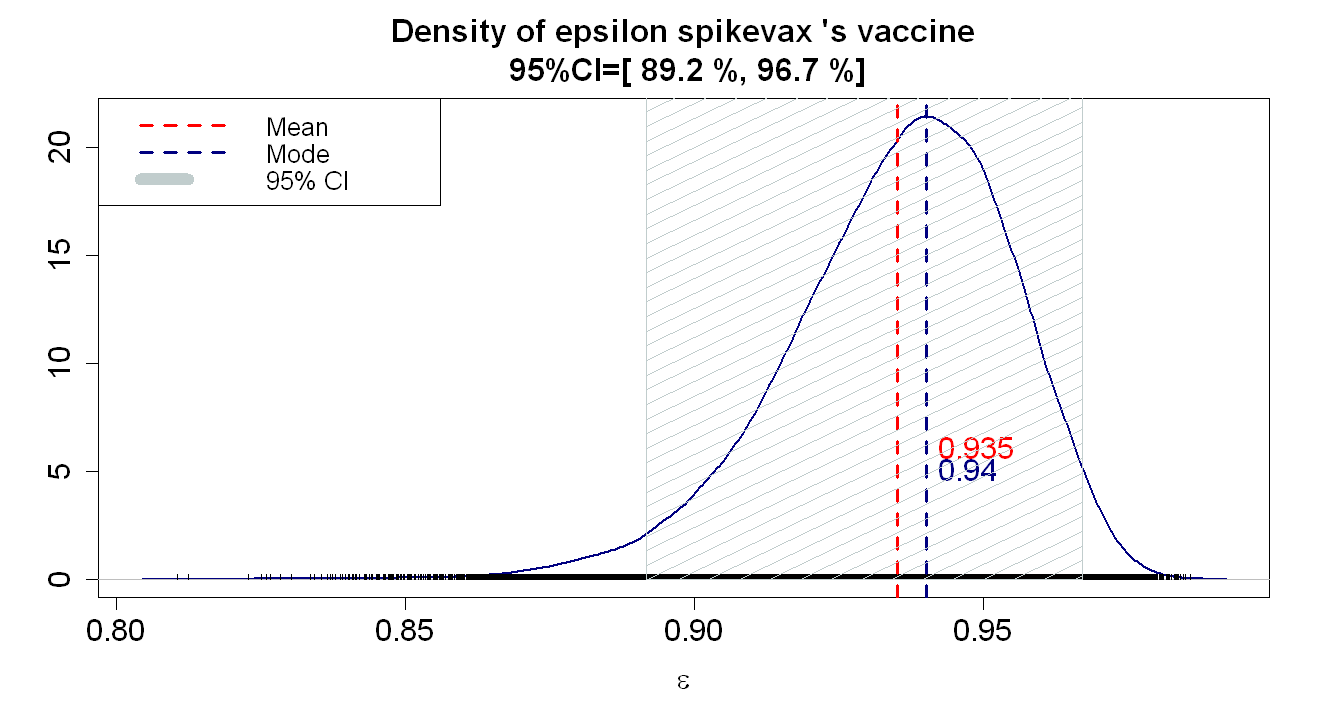

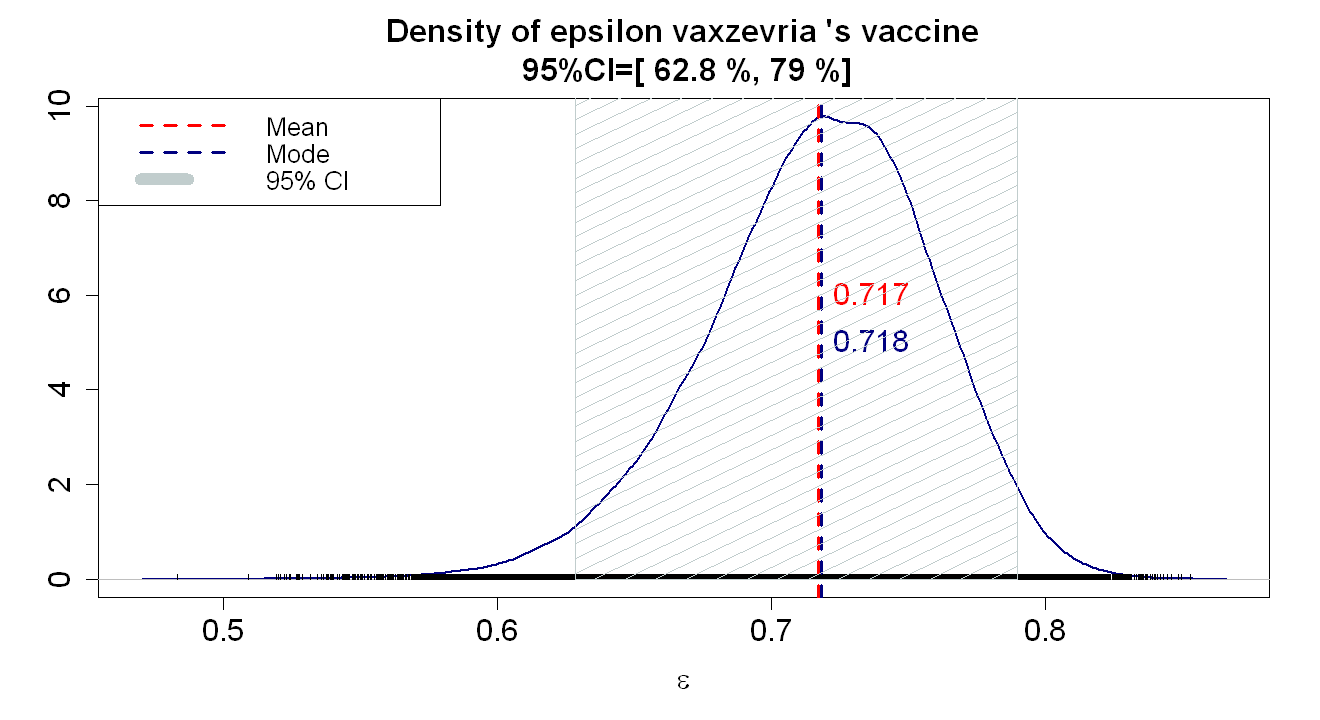

In [117]:
#data:
nuvaxovid <- list(nV.I=14,nP.I=63,nV=17312,nP=8140)
jcovden <-list(nV.I=116,nP.I=348,nV=19630,nP=19691)
pizer <- list(nV.I=8,nP.I=162,nV=18198,nP=18325)
spikevax <- list(nV.I=11,nP.I=185,nV=14134,nP=14073)
vaxzevria <- list(nV.I=73,nP.I=130,nV=17312,nP=8550)

#results
df=data.frame("Name"=0,"Efficancy_mean"=0,"Efficancy_std"=0,"Efficancy_Mode"=0,"Lower 95% CI"=0,"Upper 95% CI"=0,"nV.I"=0,"nV"=0,"nP.I"=0,"nP"=0)
n=plot_95CI(nuvaxovid,"nuvaxovid")
df[1,] <- n
j=plot_95CI(jcovden,"jcovden")
df[nrow(df) + 1,] <- j
p=plot_95CI(pizer,"pizer")
df[nrow(df) + 1,] <- p
s=plot_95CI(spikevax,"spikevax")
df[nrow(df) + 1,] <- s
v=plot_95CI(vaxzevria,"vaxzevria")
df[nrow(df) + 1,] <- v

In [118]:
View(df)

,Name,Efficancy_mean,Efficancy_std,Efficancy_Mode,Lower.95..CI,Upper.95..CI,nV.I,nV,nP.I,nP
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,nuvaxovid,0.887,0.033,0.897,81.204,94.003,14,17312,63,8140
2,jcovden,0.662,0.036,0.67,58.692,72.806,116,19630,348,19691
3,pizer,0.944,0.019,0.949,89.951,97.469,8,18198,162,18325
4,spikevax,0.935,0.019,0.94,89.165,96.713,11,14134,185,14073
5,vaxzevria,0.717,0.041,0.718,62.845,78.966,73,17312,130,8550


* nP.I: &emsp; number of people in placebo gp who got Infected


* nV.I: &emsp; number of people in vaccine gp who got Infected


* nV:  &emsp;  number people in vaccine gp


* nP:  &emsp;   number people in placebo gp


* epsilon:&emsp;efficacy of vaccine = 1 - prob